In [ ]:
# PCA on dummy student data, with covariance matrix
import pandas as pd
import numpy as np
# Step 1: Create dummy data
data = {
"Maths":[95, 88, 92, 70, 68, 75, 45, 50, 40, 60],
"Science":[90, 85, 94, 72, 65, 78, 50, 55, 42, 58],
"English":[60, 65, 62, 80, 82, 75, 88, 84, 90, 70],
"Hindi": [58, 63, 60, 78, 85, 72, 90, 82, 88, 68]
}
df = pd.DataFrame(data)
print(df)


   Maths  Science  English  Hindi
0     95       90       60     58
1     88       85       65     63
2     92       94       62     60
3     70       72       80     78
4     68       65       82     85
5     75       78       75     72
6     45       50       88     90
7     50       55       84     82
8     40       42       90     88
9     60       58       70     68


In [2]:
# Disolav covariance matrix
print("\nCovariance Matrix:\n", df.cov())


Covariance Matrix:
               Maths     Science     English       Hindi
Maths    384.233333  343.255556 -194.422222 -205.688889
Science  343.255556  314.988889 -170.600000 -182.177778
English -194.422222 -170.600000  118.266667  127.400000
Hindi   -205.688889 -182.177778  127.400000  140.488889


In [3]:
#Add a "Result" column
df['Result'] = ((df['Maths'] >= 60) & (df['Science'] >= 60) & (df['English'] >= 60) & (df['Hindi'] >= 60)).astype(int)
print(df)

   Maths  Science  English  Hindi  Result
0     95       90       60     58       0
1     88       85       65     63       1
2     92       94       62     60       1
3     70       72       80     78       1
4     68       65       82     85       1
5     75       78       75     72       1
6     45       50       88     90       0
7     50       55       84     82       0
8     40       42       90     88       0
9     60       58       70     68       0


In [4]:
# Save to CSV (optional)
df.to_csv("student_marks.csv", index=False)

In [6]:
# 2. PCA + Logistic Regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
numerical_cols = ['Maths', 'Science', 'English', 'Hindi']


In [8]:
# 3. Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df[numerical_cols])
data_clean = pd.DataFrame(data_imputed, columns=numerical_cols)

In [9]:
# 4. Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [10]:
# 5. Apply PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_scaled)
print(data_pca)

[[-2.83048369e+00 -1.46680064e-01  1.03135129e-01  4.13814785e-02]
 [-2.02875433e+00 -1.73247991e-02  4.86078152e-02  3.95900733e-02]
 [-2.68138360e+00  9.77416905e-02 -1.13081334e-01 -1.10138345e-01]
 [ 2.36280296e-01  5.07569044e-01 -9.16246818e-02  6.92243938e-02]
 [ 9.03887923e-01  6.58191987e-01  2.77746391e-01  6.24890619e-04]
 [-5.85058501e-01  3.14876712e-01 -1.68224541e-01  3.34266134e-02]
 [ 2.48219868e+00  1.22759562e-01  3.34271927e-02 -1.47418695e-01]
 [ 1.65070137e+00 -1.57589608e-01 -1.40418485e-01 -1.79460366e-02]
 [ 2.86256025e+00 -2.70559283e-01 -3.17439406e-02  1.04861025e-01]
 [-9.94839852e-03 -1.10898524e+00  8.21764560e-02 -1.36053981e-02]]


In [13]:
# 6. Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

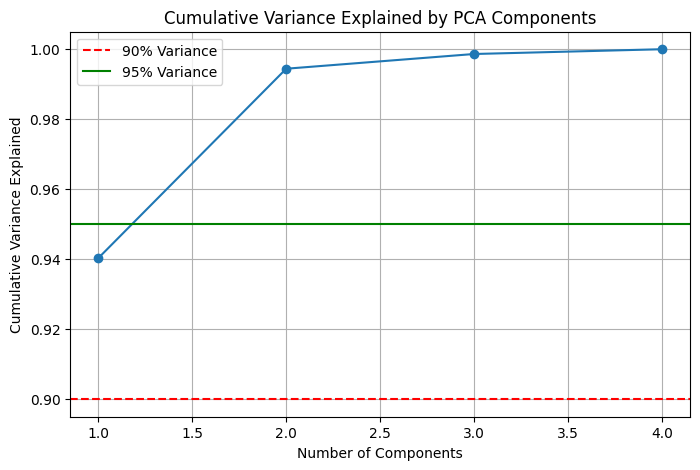

In [16]:
# 7. Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
marker='o', linestyle='-')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print("\nExplained Variance Ratio:")
print(explained_variance.round(3))
print("InCumulative Variance:")
print(cumulative_variance.round(3))


Explained Variance Ratio:
[0.94  0.054 0.004 0.001]
InCumulative Variance:
[0.94  0.994 0.999 1.   ]


In [20]:
# 9. Feature Loadings
loadings = pd.DataFrame(
pca.components_. T,
columns=[f'PC{i+1}' for i in range(pca.n_components_)],
index=numerical_cols
)
print("InFeature Loadings:")
print(loadings.round(3))

InFeature Loadings:
           PC1    PC2    PC3    PC4
Maths   -0.503  0.440  0.535  0.517
Science -0.497  0.554 -0.529 -0.408
English  0.503  0.444 -0.457  0.584
Hindi    0.497  0.550  0.474 -0.475


In [23]:
# 10. Logistic Regression on PCA-Reduced Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Find minimum number of components for 95% variance
index_of_95 = np.argmax(cumulative_variance>= 0.95)
if cumulative_variance[index_of_95] >=0.95:
    n_opt =index_of_95+1
else:
    n_opt = len(explained_variance)
print(f"InOptimal number of PCA components (≥95% variance): {n_opt}")

InOptimal number of PCA components (≥95% variance): 2


In [25]:
# Reduced PCA features
X_pca_reduced = data_pca[:, :n_opt]
y = df['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X_pca_reduced, y, test_size=0.3, random_state=42, stratify=y
)

In [28]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred =log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\n -- Logistic Regression Results --- ")
print(f"Accuracy using {n_opt} PCA components: {accuracy : .4f}")


 -- Logistic Regression Results --- 
Accuracy using 2 PCA components:  0.6667
